# Food project


![image.jpg](img.jpg)

Img source: fair-point.com

## Discovery (identificazione del problema e degli obiettivi)

Negli ultimi secoli la popolazione mondiale è aumentata notevolmente e secondo l'ONU (fonte del 2019), nel 2050 potrebbe arrivare a quota *10 miliardi*. 

In maniera direttamente proporzionale **sono aumentate anche le domande di cibo, energia ed acqua**, per soddisfare tale bisogno. 

Sfortunamente, i costanti monitoraggi sul cambiamento climatico indicano che la temperatura massima annuale sulla Terra sta cambiando pericolosamente e *parte di questo effetto è direttamente correlato alla produzione agricola e all'allevamento* (questo settore ha un impatto del 25-30% sulle emissioni totali di CO₂).

- La produzione alimentare richiede acqua ed energia; 
- La produzione energetica tradizionale richiede risorse idriche; 
- L'agricoltura fornisce una potenziale fonte di energia e tanta acqua. 
 
Garantire che nel mondo tutte le persone abbiano accesso a una dieta nutriente *in modo sostenibile* è una delle maggiori sfide che dobbiamo affrontare. 


> **L'obiettivo di questo notebook** è quello di fornire una visione di insieme sulla *produzione mondiale di alimenti e mangimi* e sui *fenomeni inquinanti* direttamente correlati a questo processo.

### Spunti e domande che guideranno questa analisi

#### Confronto tra produzione di cibo e mangime a livello mondiale: 
    
- Come è variata la loro produzione negli anni?

- Quali paesi sono i maggiori produttori? 

- Quali sono gli alimenti maggiormente prodotti?

#### Processo produttivo e inquinamento:

- La produzione di quali alimenti ha un impatto maggiormente negativo sull'ambiente?

- Quale fase della produzione alimentare contribuisce maggiormente all'emissione di gas serra?

- Quali sono gli alimenti la cui produzione ha meno impatto per le emissioni di gas serra?

- Come è variata l'emissione di gas serra nell'atmosfera nel tempo?

- Quanto si è innalzata la temperatura globale dall'ultimo secolo ad oggi?

---
---
## Data selection

Questo progetto sfrutta diversi datasets: 

- Il [primo](https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production), fornito dalla **FAO (Food and Agriculture Organization of the United Nations)**, mostra una panoramica della produzione alimentare mondiale *dal 1961 al 2013*, concentrandosi su un confronto tra **alimenti prodotti per il consumo umano** (denominati 'food') e **mangimi** (denominati 'feed') prodotti per l'allevamento di animali.

- Il [secondo](https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production), fornito da Our World in Data, contiene i valori di utilizzo dell'*acqua*, le emissioni di *gas serra* ed altri valori di emissione necessari per la realizzazione dei **43 alimenti più comuni** prodotti nel mondo.

### Import di dati, moduli e funzioni utili

In [282]:
# Librerie essenziali
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerie utili
import fuzzywuzzy
from fuzzywuzzy import process

import warnings

# Settings delle librerie
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 63)

In [283]:
# Dataset della produzione di cibi/mangimi dei vari paesi del mondo
fao_df = pd.read_csv('Data/Fao.csv')
df_prod = fao_df.copy()

# Dataset delle emissioni di gas serra e dei consumi di acqua per la produzione di alimenti
emission_df = pd.read_csv('Data/Food_Production.csv')
df_emiss = emission_df.copy()

---
---
## Data cleaning

### Dataset della produzione di cibi/mangimi dei vari paesi del mondo

In [284]:
df_prod.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


#### Valori nulli

Procedo verificando la presenza di valori nulli (*NaN*) nel dataset. Se effettivamente presenti, approfondisco l'analisi per sapere quanti sono e in quali colonne sono maggiormente frequenti. Inoltre, proverò a fare un *imputation*, ovvero a stabilire il motivo della loro presenza. 

In [285]:
print(f'Dimensioni del dataframe: {df_prod.shape}')

# Quante celle contengono valori nulli rispetto alle celle totali?
total_cells = np.product(df_prod.shape)
print(f'Numero totale di celle: {total_cells}')

total_missing = df_prod.isnull().sum().sum()
print(f'Numero totale di celle con valori nulli: {total_missing}')

percent_missing = round(total_missing/total_cells * 100, 2)
print(f'\nPercentuale di valori nulli in questo Dataframe: {percent_missing}%')

Dimensioni del dataframe: (21477, 63)
Numero totale di celle: 1353051
Numero totale di celle con valori nulli: 117450

Percentuale di valori nulli in questo Dataframe: 8.68%


In [286]:
pd.set_option('display.max_rows', 63)

# La funzione pd.DataFrame.info() fornisce in questo caso un output un po' confusionario per via delle molte colonne,
# quindi costruisco una tabella riassuntiva più leggibile sui Dtype, valori unici e valori nulli di tutte le colonne
print("Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:")

df_prod_info= pd.DataFrame({"Dtype": df_prod.dtypes, 
                            "Valori unici": df_prod.nunique(),
                            "Valori mancanti(%)": round(df_prod.isnull().sum()/df_prod.shape[0]*100, 2)
                            }).rename_axis('Colonne', axis='rows')                       

df_prod_info

Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:


,Dtype,Valori unici,Valori mancanti(%)
Colonne,,,
Area Abbreviation,object,169,0.00
Area Code,int64,174,0.00
Area,object,174,0.00
Item Code,int64,117,0.00
Item,object,115,0.00
Element Code,int64,2,0.00
Element,object,2,0.00
Unit,object,1,0.00
latitude,float64,173,0.00


Le colonne che contengono le percentuali maggiori di valori nulli sono quelle che indicano i dati di produzione *tra il 1961 e il 1991*. Come si può leggere tra la documentazione del dataset:

>The Food Balance sheet's data was relatively complete. A few countries that do not exist anymore, such as Czechoslovakia, were deleted from the database. Countries which were formed lately such as South Sudan were kept, even though they do not have all full data going back to 1961. [...]

Quindi, in un certo senso, sembrerebbe che particolari *evoluzioni geopolitiche di alcuni paesi* siano la causa dell'indisponibilità dei dati.  

Prendo un campione a caso dove sono presenti questi valori nulli, cercando di fare chiarezza e di confermare le informazioni contenute nella documentazione del dataset.  

In [287]:
# Ricerco il subset del dataframe contenente tutti valori nulli
df_null_rows = df_prod.loc[df_prod.isnull().any(axis=1)]
print(f'\nNumero di righe con valori nulli: {df_null_rows.shape[0]}')

# Imposto un random seed per rendere pseudorandomica e riproducibile questa cella
np.random.seed(0)

# Seleziono un campione a caso di 5 elementi
df_null_rows.sample(5)


Numero di righe con valori nulli: 3539


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
17328,SVK,199,Slovakia,2517,Millet and products,5521,Feed,1000 tonnes,48.67,19.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1
13020,MNE,273,Montenegro,2617,Apples and products,5142,Food,1000 tonnes,42.71,19.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,19.0,34.0,38.0,33.0,27.0,14,13
17526,SVN,198,Slovenia,2733,Pigmeat,5142,Food,1000 tonnes,46.15,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,81.0,84.0,75.0,70.0,73.0,77.0,87.0,76.0,82.0,78.0,88.0,88.0,88.0,89.0,84.0,84.0,80.0,81.0,76.0,69,58
11128,LVA,119,Latvia,2656,Beer,5142,Food,1000 tonnes,56.88,24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,53.0,66.0,67.0,66.0,73.0,82.0,100.0,99.0,105.0,134.0,142.0,124.0,144.0,147.0,158.0,156.0,146.0,164.0,172.0,163,156
16103,RUS,185,Russian Federation,2560,Coconuts - Incl Copra,5142,Food,1000 tonnes,61.52,105.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,2.0,2.0,10.0,10.0,21.0,28.0,42.0,45.0,47.0,52.0,45.0,59.0,42.0,39.0,48.0,63.0,57,63


In effetti, in questi 5 paesi selezionati a caso: 'Slovacchia', 'Montenegro', 'Slovenia', 'Lettonia' e 'Federazione Russa', i dati di produzione sono mancanti dal 1961 al 1991 (il Montenegro fino al 2005). 

Cercando informazioni sulla storia geopolitica di questi paesi (fonte: [Wikipedia](https://it.wikipedia.org/wiki/Pagina_principale)) si può leggere:

- *Slovacchia*: [...] La Repubblica Slovacca e la Repubblica Ceca sono nate il 1º gennaio 1993 dalla divisione, sancita dal parlamento della Cecoslovacchia, che **già dal 1990 aveva assunto il nome di Repubblica Federale Ceca e Slovacca**;

- *Montenegro*: [...] Fino al 2 giugno 2006 la Repubblica del Montenegro è stata unita alla Repubblica di Serbia con il nome di Serbia e Montenegro. **Dal 3 giugno 2006 il Montenegro è diventato uno Stato indipendente**;

- *Slovenia*: [...] Dal 1º maggio 2004 la Slovenia è membro dell'Unione europea e la valuta nazionale, dal 1º gennaio 2007, è l'euro, che ha sostituito il tallero sloveno, adottato **nel 1991 dopo l'indipendenza** [...];

- *Lettonia*: [...] L'URSS riconobbe **la Lettonia come Stato indipendente il 6 settembre 1991** [...];

- *Federazione Russa*: [...] Nell'agosto del 1991 il tentato colpo di Stato militare per deporre Gorbačëv e preservare l'Unione Sovietica portò invece alla fine del Partito Comunista dell'Unione Sovietica. Nonostante la contraria volontà espressa dal popolo, **il 26 dicembre 1991 l'Unione Sovietica si dissolse in quindici Stati post-sovietici**.

Questo risultato **è in linea con la documentazione** del dataset, giustificando il retroscena che riguarda la presenza di valori mancanti.

**È conveniente** eliminare dal dataframe le righe che contengono valori nulli, oppure si rischia di perdere un numero **eccessivo** di informazioni?

In [288]:
# Creo un dataframe droppando le righe che contengono valori nulli 
test_drop = df_prod.dropna()

# Calcolo la percentuale di dati eliminati rispetto dal dataframe originale
rows_removal_perc = round((1-test_drop.shape[0]/df_prod.shape[0])*100,2)

# Stampo le informazioni sul numero di righe totali e la shape dei due dataframes
print(f"\nRighe del dataframe originale: {df_prod.shape[0]}. Shape del dataframe originale: {df_prod.shape}")
print(f"Righe del dataframe dopo aver rimosso i valori mancanti: {test_drop.shape[0]}. \
Shape del dataframe modificato: {test_drop.shape}")
print(f'\nLa rimozione delle righe che contengono valori NaN ha eliminato il {rows_removal_perc}% dei dati!')


Righe del dataframe originale: 21477. Shape del dataframe originale: (21477, 63)
Righe del dataframe dopo aver rimosso i valori mancanti: 17938. Shape del dataframe modificato: (17938, 63)

La rimozione delle righe che contengono valori NaN ha eliminato il 16.48% dei dati!


Avrei anche potuto sostituire i valori NaN con 0 tramite *fillna()*. Tuttavia, voglio visualizzare la produttività dei vari paesi nell'arco temporale più lungo possibile, scartando le righe che non contengono dati in questo senso. Inoltre, secondo me, operando in questo modo **si perdono quantità tollerabili di dati**. Quindi, continuerò lo studio di questo dataset adottando questa procedura.

#### Cleaning variabili qualitative

##### Esplorazione e manipolazione della colonna 'Area'

Questa procedura sarà fondamentale per garantire che i nomi dei paesi non siano presenti come duplicati o formattati in maniera impropria. 

In [289]:
# Cambio il nome del dataframe per renderlo più gestibile
df = test_drop.copy()

In [290]:
# Creo una serie per vedere se alcune etichette di 'Area Abbreviation' sono state utilizzate per più di un paese
find_duplicates = df.groupby('Area Abbreviation')['Area'].nunique()
find_duplicates[find_duplicates > 1]

Area Abbreviation
CHN    4
Name: Area, dtype: int64

In [291]:
# Uso l'etichetta 'CHN' per creare un filtro
chn_filter = df['Area Abbreviation'].isin(['CHN'])

# Uso il filtro per estrapolare un dataframe composto solo da paesi con etichetta 'CHN'
chn_df = df.loc[chn_filter]

# Creo una lista dall'array dei valori unici nella colonna 'Area' 
chn_countries = chn_df.Area.unique().tolist()

# Sostituisco i nomi delle località presenti nella lista chn_countries con 'China' usando un dictionary comprehension
df.Area.replace({country:'China' for country in chn_countries}, inplace=True)

Sistemata l'incongruenza tra gli elementi di 'Area Abbreviation' e quelli di 'Area', non resta che controllare in un unico passaggio tutti gli altri nomi dei paesi. 

Uno strumento utilissimo per controllare contemporaneamente tutte le incongruenze tra diversi elementi è *fuzzywuzzy*.

In [292]:
# Lista da testare con tutti i nomi unici dei paesi
country_list = df.Area.unique().tolist()

# Inizializzo un dizionario  
top_matches = {}

# Counter per facilitare la lettura dell'output
counter = 0

for item in country_list:

    # Dopo qualche test ho valutato che conviene fare un confronto tra i primi 3 elementi...
    # (limit=4 poichè la prima tupla conterrà l'elemento sul quale il ciclo sta iterando)
    matches = fuzzywuzzy.process.extract(item, country_list, limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    
    # ...ed imporre il valore soglia >= 85!
    treshold = matches[1][1]

    if treshold >= 85:        

        # Le chiavi del dizionario corrisponderanno ai nomi dei paesi sul quale il ciclo sta iterando    
        key = item 
        
        # I valori corrisponderanno ai nomi dei paesi ottenuti per miglior match
        values = [matches[n][0] for n in range(1,4)]
        
        # Introduco chiavi e valori nel dizionario  
        top_matches[key] = values

for key, values in top_matches.items():

    counter += 1
    print(f"{counter} Elemento in esame: {key}\nMigliori matches: {values}")
    print('-'*90 + '\n')

1 Elemento in esame: Australia
Migliori matches: ['Austria', 'Mauritania', 'Guatemala']
------------------------------------------------------------------------------------------

2 Elemento in esame: Austria
Migliori matches: ['Australia', 'Costa Rica', 'Mauritania']
------------------------------------------------------------------------------------------

3 Elemento in esame: Democratic People's Republic of Korea
Migliori matches: ["Lao People's Democratic Republic", 'Republic of Korea', 'Iran (Islamic Republic of)']
------------------------------------------------------------------------------------------

4 Elemento in esame: Iceland
Migliori matches: ['Ireland', 'Finland', 'Switzerland']
------------------------------------------------------------------------------------------

5 Elemento in esame: Ireland
Migliori matches: ['Iceland', 'Finland', 'Switzerland']
------------------------------------------------------------------------------------------

6 Elemento in esame: Lao Peo

Come si può vedere, non ci sono incongruenze gravi da sistemare. C'è solo qualche ritocco da fare per semplificare la lettura dei nomi di alcuni paesi.

In [293]:
# Creo una lista con i paesi che presentano parentesi nell' etichetta del nome 
bracket = [country for country in df.Area.unique().tolist() if '(' in country.lower()]

# Creo una lista in cui inserire il loro nome seprato da tutto il resto
split_bracket = [country.split()[0] for country in bracket]

# Sostituisco i nuovi nomi con un metodo simile a quello di prima
df.Area.replace({bracket[n]:split_bracket[n] for n in range(len(bracket))}, inplace=True)

In [294]:
# Cerco i Paesi che hanno 'of' nel nome
of_names = [country for country in df.Area.unique().tolist() if 'of' in country.lower()]

# Formatto i nomi assegnando nomenclature maggiormente note
of_formatted = ['North Korea', 'South Korea', 'Tanzania', 'USA']

# Sostituisco i nuovi nomi con un metodo simile a quello di prima
df.Area.replace({of_names[n]:of_formatted[n] for n in range(len(of_names))}, inplace=True)

In [295]:
# Aggiusto questo nome "C�te d'Ivoire" in "Ivory Coast". 
df.Area.replace({"C�te d'Ivoire":'Ivory Coast'}, inplace=True)

# Infine, riordino i nomi dei paesi nel dataframe
df.sort_values('Area', inplace=True)

##### Esplorazione e manipolazione della colonna 'Item'

Ora passo ad analizzare la colonna che contiene i valori *più delicati* dei due datasets, dando un'occhiata alle nomenclature dei cibi e dei mangimi. 

L'ideale è che ci fosse *congruenza tra i nomi degli alimenti dei due datasets!*

Per non complicare eccessivamente la pulizia dei dati, mi preoccuperò solo di avere una coerenza tra i nomi più rilevanti, *in termini di emissioni totali*, del dataset delle emissioni ed i loro corrispettivi nel dataset della produzione.

In [296]:
# Visualizzo il dataframe delle emissioni
df_emiss.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [297]:
# Devo prima ordinare il dataframe delle emissioni, in ordire decrescente, secondo la colonna 'Total_emissions'
emiss_sorted = df_emiss.sort_values('Total_emissions', ascending=False).head(20)

# Poi, per comodità, ordino alfabeticamente i 20 nomi...
emiss_sorted = emiss_sorted.sort_values('Food product')

# ...e ne estraggo la lista
top20_emission_sorted = emiss_sorted['Food product'].unique().tolist()

print("I 20 alimenti più rilevanti in termini di emissioni totali:\n")

for i, n in enumerate(top20_emission_sorted):
        
    print(f'{i+1:<2} - {n}')

I 20 alimenti più rilevanti in termini di emissioni totali:

1  - Beef (beef herd)
2  - Beef (dairy herd)
3  - Cane Sugar
4  - Cheese
5  - Coffee
6  - Dark Chocolate
7  - Eggs
8  - Fish (farmed)
9  - Lamb & Mutton
10 - Milk
11 - Olive Oil
12 - Palm Oil
13 - Pig Meat
14 - Poultry Meat
15 - Rapeseed Oil
16 - Rice
17 - Shrimps (farmed)
18 - Soybean Oil
19 - Sunflower Oil
20 - Tofu



Anche in questo caso sfrutterò *fuzzywuzzy* per facilitarmi il lavoro, mentre il resto lo ricaverò osservando gli output ottenuti.

In [298]:
# Inizializzo un dizionario che avrà: 
dict_20elements = {}

counter = 0

for item in top20_emission_sorted:
    
    matches = fuzzywuzzy.process.extract(item, df.Item.unique(), limit=6, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # Come chiavi i 20 nomi degli alimenti del dataframe delle emissioni     
    key = item 
    
    # Come valori la lista dei 6 nomi ottenuti per miglior punteggio con fuzzywuzzy 
    values = [matches[n][0] for n in range(6)]
    
    # Introduco chiavi e valori nel dizionario  
    dict_20elements[key] = values

for key, values in dict_20elements.items():
    
    counter += 1

    print(f"{counter} Elemento in esame: {key}\nMigliori matches: {values}")
    print('-'*90 + '\n')

1 Elemento in esame: Beef (beef herd)
Migliori matches: ['Beer', 'Cereals, Other', 'Meat, Other', 'Sugar beet', 'Sesame seed', 'Cereals - Excluding Beer']
------------------------------------------------------------------------------------------

2 Elemento in esame: Beef (dairy herd)
Migliori matches: ['Sugar beet', 'Cereals, Other', 'Beer', 'Oilcrops Oil, Other', 'Meat, Other', 'Groundnuts (Shelled Eq)']
------------------------------------------------------------------------------------------

3 Elemento in esame: Cane Sugar
Migliori matches: ['Sugar cane', 'Sugar beet', 'Sugar Crops', 'Sugar non-centrifugal', 'Sugar (Raw Equivalent)', 'Miscellaneous']
------------------------------------------------------------------------------------------

4 Elemento in esame: Cheese
Migliori matches: ['Spices', 'Cloves', 'Sesame seed', 'Spices, Other', 'Treenuts', 'Miscellaneous']
------------------------------------------------------------------------------------------

5 Elemento in esame: Cof

Analizzando il precedente output, si ritrovano 4 situazioni differenti:

- Alcuni elementi corrispondono perfettamente e *non necessitano alcuna modifica*;

- Altri necessitano solo una *lieve modifica*; 

- Altri sono termini generalizzati e bisogna *capire se sono sostituibili*. 

- Altri ancora non hanno alcuna corrispondenza e *potrebbero non essere sostituibili*.

In [299]:
# Il dizionario qui sotto è stato creato da quello costruito nella cella precedente. Per ogni chiave ho eliminato 
# tutti i valori tranne uno, quello maggiormente attinente col nome della chiave. 
inconsistencies_dict = {

  # I nomi delle chiavi corrispondo ai nomi degli elementi del dataset delle EMISSIONI. 
  # I nomi dei valori corrispondono invece a quelli del dataset della PRODUZIONE.

  # Incongruenza: probabilmente i valori sono generalizzati
  'Beef (beef herd)': 'Meat, Other',

  # Incongruenza: probabilmente i valori sono generalizzati
  'Beef (dairy herd)': 'Meat, Other',

  # Lieve incongruenza 
  'Cane Sugar': 'Sugar cane',

  # Incongruenza GRAVE: nessun valore corrispondente.
  'Cheese': 'NONE',

  # Lieve incongruenza 
  'Coffee': 'Coffee and products',
  
  # Incongruenza GRAVE: nessun valore corrispondente.
  'Dark Chocolate': 'NONE',

  # Perfettamente congruente
  'Eggs': 'Eggs',

  # Lieve incongruenza 
  'Fish (farmed)': 'Fish, Seafood',

  # Lieve incongruenza 
  'Lamb & Mutton': 'Mutton & Goat Meat',

  # Lieve incongruenza
  'Milk': 'Milk - Excluding Butter',
  
  # Perfettamente congruente
  'Olive Oil': 'Olive Oil',
  
  # Perfettamente congruente
  'Palm Oil': 'Palm Oil',
  
  # Lieve incongruenza
  'Pig Meat': 'Pigmeat',
  
  # Perfettamente congruente
  'Poultry Meat': 'Poultry Meat',
  
  # Lieve incongruenza 
  'Rapeseed Oil': 'Rape and Mustard Oil',
 
  # Incongruenza GRAVE: nessun valore corrispondente.
  'Rice': 'NONE',

  # Incongruenza GRAVE: nessun valore corrispondente.
  'Shrimps (farmed)': 'NONE',

  # Lieve incongruenza
  'Soybean Oil': 'Soyabean Oil',

  # Lieve incongruenza
  'Sunflower Oil': 'Sunflowerseed Oil',

  # Incongruenza GRAVE: nessun valore corrispondente.
  'Tofu': 'NONE'
  }

Sistemo le incongruenze lievi, ovvero nomenclature quasi identiche tra gli elementi dei due datasets.

In [300]:
slight_inconsistencies = {key:value for (key, value) in inconsistencies_dict.items() 
                          if key != value and value != 'NONE' and value != 'Meat, Other'}

# Poiché voglio che le modifiche vengano fatte nel dataframe delle produzioni, prima di rimpiazzare 
# i nomi nel dataframe delle produzioni, devo invertire le nomenclature di chiavi e valori.
reversed_slight_inc = {key:value for (value, key) in slight_inconsistencies.items()}

# Sostituisco i nomi nel dataframe della produzione di cibo/mangimi
df.Item.replace(reversed_slight_inc, inplace=True)

Sistemo le incongruenze tra elementi generalizzati: 'meat' e 'beef'. Devo capire se ci sono alcune voci tra gli elementi del dataset della produzione che si possono associare ad alimenti a base di carne bovina. 

In [301]:
# Creo dei filtri per entrambi i casi
meat = df.Item.map(lambda text: 'meat' in text.lower())
beef = df.Item.map(lambda text: 'beef' in text.lower())

# Ottengo la lista dei valori unici per entrambi
prod_meat_list = df.loc[meat].Item.unique().tolist()
prod_beef_list = df.loc[beef].Item.unique().tolist()

print("Elementi con la dicitura 'meat' nel dataframe della produzione:")

if prod_meat_list:
    for i, n in enumerate(prod_meat_list):
        print(f'{i+1} - {n}')    
else:
    print(0)

print("\nElementi con la dicitura 'meat' nel dataframe della produzione:")

if prod_beef_list:
    for i, n in enumerate(prod_beef_list):
        print(f'{i+1} - {n}')    
else:
    print(0) 

Elementi con la dicitura 'meat' nel dataframe della produzione:
1 - Meat, Other
2 - Poultry Meat
3 - Bovine Meat
4 - Meat
5 - Pig Meat
6 - Meat, Aquatic Mammals

Elementi con la dicitura 'meat' nel dataframe della produzione:
0


Le voci 'Poultry Meat' e 'Pig Meat' sono già state sistemate prima, mentre le voci 'Meat, Acquatic Mammals' e 'Meat, Other' *si possono ignorare*, trattandosi di animali non bovini;

'Bovine Meat' si riferisce alla carne bovina derivata dagli allevamenti, come riportato nella [documentazione](https://www.fao.org/faostat/en/#data/FBSH). Pertanto, *si può sostituire* questa voce con l'elemento 'Beef (beef herd)', che indica le carni bovine provenienti dalle mandrie;

'Meat' non possiede una descrizione nella documentazione del dataset, pertanto *non è sostituibile*.

In [302]:
# Sostituisco il nome nel dataframe della produzione di cibo/mangimi
df.Item.replace({'Bovine Meat': 'Beef (beef herd)'}, inplace=True)

Infine, provo a sistemare le incongruenze gravi, ovvero quelle voci che non hanno trovato alcuna corrispondenza con fuzzywuzzy.

In [303]:
# Incongruenze gravi: 
heavy_inconsistencies = {key: value for key, value in inconsistencies_dict.items() if value == 'NONE'}
heavy_inconsistencies

{'Cheese': 'NONE',
 'Dark Chocolate': 'NONE',
 'Rice': 'NONE',
 'Shrimps (farmed)': 'NONE',
 'Tofu': 'NONE'}

La documentazione nel dataset della FAO aiuta (in piccola parte) a risolvere queste ultime incongruenze: 

- 'Rice' è presente nel dataframe della produzione con dicitura 'Rice (Milled Equivalent)' quindi *può essere sostituito*;

- 'Cheese', 'Dark Chocolate', 'Shrimps (farmed)' e 'Tofu' sono tutte voci riferite ad un alimento specifico che non posso scorporare dal dataset della produzione (es.: 'Tofu' è rappresentato dalla voce 'Soyabeans', ma oltre a questo la voce 'Soyabeans' include anche salsa di soia, pasta di soia e semi di soia). Pertanto queste voci *non possono essere sostituite*.

In [304]:
# Sostituisco il nome nel dataframe della produzione di cibo/mangimi
df.Item.replace({'Rice (Milled Equivalent)': 'Rice'}, inplace=True)

#### Cleaning variabili quantitative

##### Latitudine e Longitudine

I valori di latitudine e longitudine possono assumere solo un range di valori compresi rispettivamente tra -90° e +90° e -180° e +180°. Controllo che questo range di valori sia stato rispettato e non ci sia nulla di anomalo. 

In [305]:
df.loc[:, ['latitude', 'longitude']].agg([min, max])

,latitude,longitude
min,-40.90,-172.10
max,64.96,179.41


##### Valori di produzione 

Poiché sono interessato a visualizzare la produzione di cibo e la sua crescita negli anni, mi voglio concentrare solo sui valori positivi nel dataframe. Procedo quindi ad eliminare le eventuali righe dove sono presenti valori negativi. 

Infine, trasformo tutti i numeri riferiti agli anni di produzione in formato 'int64'.

In [306]:
# Creo un filtro per cercare valori nulli dal 1961 al 2013
negatives_filter = df.loc[:, 'Y1961':'Y2013'].values < 0

negatives_df = df.loc[negatives_filter]

# Ricavo l'indice della riga...
index_el = negatives_df.index

# ... e la elimino dal dataframe
df.drop(labels=index_el, inplace=True)

In [307]:
# Trasformo i dati in 'int64'
df.loc[:, 'Y1961':'Y2013'] = df.loc[:, 'Y1961':'Y2013'].astype('int64')

#### Manipolazione e trasformazione delle features del dataframe

 Sistemo le denominazioni delle colonne e resetto l'indice.

In [308]:
# Rimuovo la 'Y' dalle labels degli anni
df.rename(columns={n:n[1:] for n in df.columns if 'Y' in n}, inplace=True)

# Sostituisco gli spazi nelle features delle colonne per renderle più maneggiabili
df.rename(columns={n:n.replace(' ', '_') for n in df.columns if ' ' in n}, inplace= True)

# Resetto l'indice e riporto il nome del dataframe da df a df_prod
df.reset_index(drop=True, inplace=True)

df_prod = df.copy()

### Dataset delle emissioni di gas serra e dei consumi di acqua

In [309]:
# Utilizzo momentaneamente un nome più corto per manipolare il dataframe
df = df_emiss.copy()

df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


#### Valori nulli

Anche per questo dataset, la prima operazione di data cleaning valuterà la presenza e la manipolazione dei valori nulli.

In [310]:
print(f'Dimensioni del dataframe: {df.shape}')

# Quante celle contengono valori nulli rispetto alle celle totali?
total_cells = np.product(df.shape)
print(f'Numero totale di celle: {total_cells}')

total_missing = df.isnull().sum().sum()
print(f'Numero totale di celle con valori nulli: {total_missing}')

percent_missing = round(total_missing/total_cells * 100, 2)
print(f'\nPercentuale di valori nulli in questo Dataframe: {percent_missing}%')

Dimensioni del dataframe: (43, 23)
Numero totale di celle: 989
Numero totale di celle con valori nulli: 158

Percentuale di valori nulli in questo Dataframe: 15.98%


In [311]:
pd.set_option('display.max_rows', 23)

# Costruisco una tabella riassuntiva sui Dtype, valori unici e valori nulli di tutte le colonne
print("Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:")

emission_df_info = pd.DataFrame({"Dtype": df.dtypes, 
                                 "Valori unici": df.nunique(),
                                 "Valori mancanti(%)": round(df.isnull().sum()/df.shape[0]*100, 2)
                                 }).rename_axis('Colonne', axis='rows')                       

emission_df_info.sort_values(by='Valori mancanti(%)')

Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:


,Dtype,Valori unici,Valori mancanti(%)
Colonne,,,
Food product,object,43,0.00
Land use change,float64,21,0.00
Animal Feed,float64,10,0.00
Farm,float64,24,0.00
Processing,float64,10,0.00
Transport,float64,8,0.00
Packging,float64,10,0.00
Retail,float64,4,0.00
Total_emissions,float64,33,0.00


Come si può vedere dal precedente output, la presenza dei valori nulli si riscontra esclusivamente nelle colonne che valutano:

- L'emissione di molecole eutrofizzanti (PO₄);

- La quantità di acqua necessaria per la produzione dell'alimento; 

- L'emissione di anidride carbonica (CO₂);

- L'area di terreno utilizzato (m²);

- Il rapporto tra l'acqua necessaria per la produzione dell'alimento e la disponibilità locale di acqua. 

Per ognuna di queste 5 colonne (tranne quella relativa alla CO₂) si è indicato il valore di emissione/consumo in rapporto a 1 kilogrammo, 100 grammi di proteine, o 1000 kcal di alimento prodotto. 

Per questa analisi intendo tralasciare i dati delle emissioni rapportate alle proteine e alle kcal, concentrandomi su quelle espresse *per kilogrammo di prodotto*. 

Ho adottato questa procedura perché: 

1. Il numero di valori nulli è maggiore per le emissioni non espresse in kilogrammi;

2. I valori dei due dataset sono espressi in unità di misura derivate dai kilogrammi (1000 tonnellate). 

In [312]:
# Lista delle colonne con valori nulli da eliminare
columns_to_delete = [n for n in df.columns if 'protein' in n.lower() or 
                                              'kcal' in n.lower() or 
                                              'scarcity-weighted' in n.lower()]

df.drop(columns=(columns_to_delete), inplace=True)

In [313]:
# Sostituisco i valori mancanti rimasti con 0
if df.isnull().sum().sum() > 0:

    df.fillna(0, inplace=True)

#### Cleaning variabili qualitative e quantitative

Le uniche variabili qualitative sono i nomi degli alimenti, che non presentano alcun errore o ripetizione. 

Anche le variabili quantitative sono apposto, presentando tutte il dtype *float64*. Eventuali valori negativi indicano che l'alimento in questione assorbe più CO₂ di quanta ne emette dal suo ciclo produttivo. 

#### Manipolazione e trasformazione delle features del dataframe



In [314]:
# Rimuovo gli spazi nei titoli delle colonne che non contengono parentesi
df.rename(columns={cols: cols.replace(' ', '_') for cols in df.columns if not '(' in cols}, inplace=True)

# Modifico i titoli più lunghi e li sostituisco nel dataframe, eliminando anche gli spazi
replace_dict = {
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)":"Eutrophying emissions(gPO₄/kg)",
    "Freshwater withdrawals per kilogram (liters per kilogram)":"Freshwater withdrawals(L/kg)",
    "Land use per kilogram (m² per kilogram)":"Land use(m²/kg)"
    }

df.rename(columns={key:value.replace(' ', '_') for (key, value) in replace_dict.items()}, inplace=True)

# Riporto il nome del dataframe da df a df_emiss
df_emiss = df.copy()

---
---
## Data exploration/trasformation

### Confronto tra produzione di cibo e mangime a livello mondiale

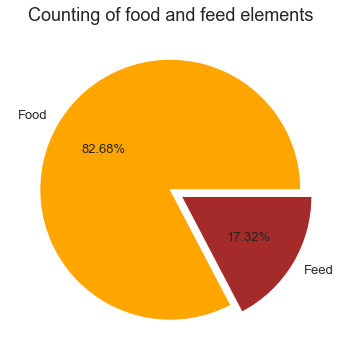

In [315]:
elements = df_prod["Element"].value_counts()

labels = elements.index
explode = [0, 0.1] 
colors = ['orange', 'brown']

plt.figure(figsize = (8,6))
plt.pie(elements, labels=labels, explode=explode, autopct='%1.2f%%', colors=colors, textprops={'fontsize': 13})

plt.title("Counting of food and feed elements", fontsize=18)
plt.show()

Come prevedibile, gli elementi che riguardano il cibo sono molti in più rispetto ai mangimi. 

Questo significa che nel tempo è stato prodotto molto più cibo che mangime?

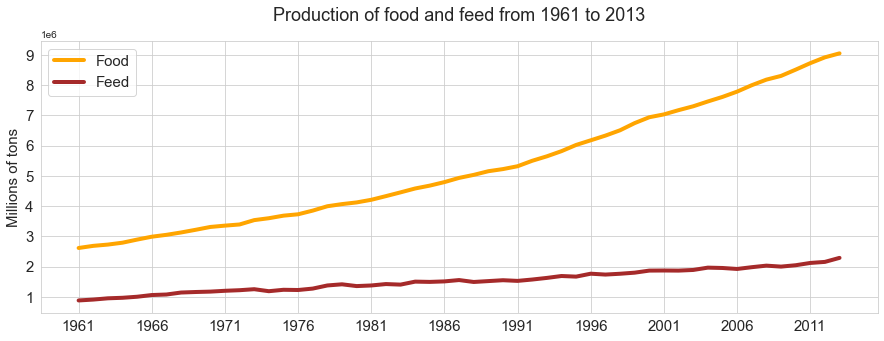

In [316]:
years_of_production = [str(n) for n in range(1961, 2013+1)]

# Raggruppo tutti gli elementi di cibi e mangimi e sommo i quantitativi prodotti ogni anno 
total_production = df_prod.groupby('Element')[years_of_production].sum()

sns.set_style('whitegrid')

plt.figure(figsize=(15,5))

sns.lineplot(data=total_production.loc['Food'], label='Food', linewidth=4, color='orange')
sns.lineplot(data=total_production.loc['Feed'], label='Feed', linewidth=4, color='brown')

plt.title('Production of food and feed from 1961 to 2013', size=18, pad=20)

plt.ylabel('Millions of tons', size=15)
plt.yticks(size=15)

plt.xticks(np.arange(0, len(years_of_production), 5), size=15)

plt.legend(prop={'size': 15})
plt.show()

Non solo è stato prodotto molto più cibo che mangime dal 1961 al 2013, ma anche il suo incremento di produzione è superiore. Infatti, in poco più di 50 anni la produzione di mangime è raddoppiata, mentre quella del cibo è più che triplicata!

Analizzo qualche statistica compatta sui due estremi degli anni di produzione, osservando quale è stata la produzione massima di cibo e mangimi nel 1961 e nel 2013. Inoltre, voglio iniziare ad indagare su quali sono i cibi, i mangimi e i paesi più frequenti nel dataframe.

In [327]:
aggregations = {
    'Max prod 1961':pd.NamedAgg('1961', 'max'),
    'Max prod 2013':pd.NamedAgg('2013', 'max'),
    'Most frequent product':pd.NamedAgg('Item', lambda n:n.mode()),
    'Most frequent country':pd.NamedAgg('Area', lambda n:n.mode())
    }

df_prod.groupby('Element').agg(**aggregations)

,Max prod 1961,Max prod 2013,Most frequent product,Most frequent country
Element,,,,
Feed,112227,193043,Milk,China
Food,74071,489299,"[Eggs, Milk]",China


In [ ]:
# [ ] Commentare la tabella ottenuta

# [ ] Spiegare la prossima analisi

In [337]:
# [ ] Trova un modo migliore per ricavare i numeri degli indici
indexes = df_prod.groupby('Element')['1961', '2013'].idxmax()

for idx, rows in indexes.iterrows():
    print(rows['1961'])
    print(rows['2013'])

16631
3224
3265
3272


In [222]:
# [ ] Unisci a quella di prima e fai tutto in un passaggio
top_extremes = df_prod.loc[

        [16631, 3224, 3265, 3272], 
        ['Area', 'Item', 'Element', '1961', '2013']

        ].sort_values(by='2013', ascending=False).reset_index()

top_extremes

,index,Area,Item,Element,1961,2013
0,3272,China,Vegetables,Food,52968,489299
1,3224,China,Cereals - Excluding Beer,Feed,17963,193043
2,16631,USA,Cereals - Excluding Beer,Feed,112227,140096
3,3265,China,Starchy Roots,Food,74071,95208


In [ ]:
# [ ] Spiega la tabella e passa alla prossima 

In [223]:
top_extremes['Ratio'] = (top_extremes['2013']/top_extremes['1961']).round(2)
top_extremes

,index,Area,Item,Element,1961,2013,Ratio
0,3272,China,Vegetables,Food,52968,489299,9.24
1,3224,China,Cereals - Excluding Beer,Feed,17963,193043,10.75
2,16631,USA,Cereals - Excluding Beer,Feed,112227,140096,1.25
3,3265,China,Starchy Roots,Food,74071,95208,1.29


In [ ]:
# [ ] Spiega la tabella ottenuta qui sopra e prepara la prossima mossa

In [621]:
# [ ] Questa è sia da sistamre che da aggiustare

# Top 3 produttori nel 2013
aggregations = {'Top produzione 2013 (1000 tonnellate)':pd.NamedAgg('2013', max)}

df_prod.groupby(['Area', 'Element']).agg(**aggregations).sort_values(by='Top produzione 2013 (1000 tonnellate)',
                                                                     ascending=False).head()

Top produzione 2013 (1000 tonnellate)
Area  Element                                       
China Food                                    489299
      Feed                                    193043
India Food                                    185884
USA   Feed                                    140096
      Food                                     81513

In [ ]:
# [ ] Prepara la prossima mossa per la data vis o passare oltre e graficare dopo? In ogni caso va sfruttato plotly

In [623]:
country_data = px.data.gapminder()

map_fig = px.scatter_geo(
    country_data,
    locations = 'iso_alpha',
    projection = 'orthographic',
    color = 'continent',
    opacity = .8,
    hover_name = 'country',
    hover_data = ['lifeExp', 'pop', 'year']
    )

map_fig.show()

In [624]:
# Questo serve per visualizzare in html
# plotly.offline.plot(map_fig, filename= 'map_exp.html', auto_open=True)

'map_exp.html'